In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
###OPENCV has provided some pretrained classifiers 
###STORED in .XML files

# We point OpenCV's CascadeClassifier function to where our 
# classifier (XML file format) is stored

face_identifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
print(type(face_identifier))

<class 'cv2.CascadeClassifier'>


Scale Factor Specifies how much we reduce the image size each time we scale. E.g. in face detection we typically use 1.3. This means we reduce the image by 30% each time it’s scaled. Smaller values, like 1.05 will take longer to compute, but will increase the rate of detection.
Min Neighbors Specifies the number of neighbors each potential window should have in order to consider it a positive detection. Typically set between 3-6. It acts as sensitivity setting, low values will sometimes detect multiples faces over a single face. High values will ensure less false positives, but you may miss some faces.

In [3]:
image=cv2.imread('images/sachin1.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

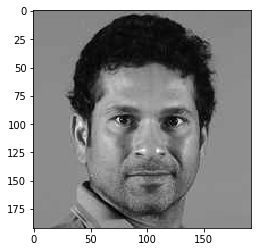

In [4]:
plt.imshow(gray, cmap='gray')

In [5]:
# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = face_identifier.detectMultiScale(gray, 1.05, 5)

In [6]:
faces

array([[ 38,  47, 129, 129]], dtype=int32)

## FACE DETECTION

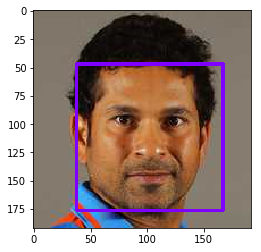

In [7]:
if faces is ():
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    cv2.rectangle(image_RGB, (x,y), (x+w,y+h), (127,0,255), 2)
    plt.imshow(image_RGB,'gray')
    
    


[[26 35 31 31]
 [71 36 29 29]]


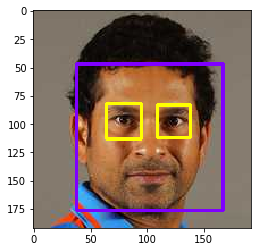

In [8]:
import numpy as np
import cv2
 
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')
 
img = cv2.imread('images/sachin1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
faces = face_classifier.detectMultiScale(gray, 1.05, 5)

# When no faces detected, face_classifier returns and empty tuple

if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img_RGB,(x,y),(x+w,y+h),(127,0,255),2)
    plt.imshow(img_RGB)
    #cv2.waitKey(0)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img_RGB[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray, 1.05,5)
    print(eyes)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
        plt.imshow(img_RGB)
        #cv2.waitKey(0)
    


## LIVE EYE AND FACE DETECTOR 

In [ ]:
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

def face_detector(img, size=1):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.05, 5)
    if faces is ():
        return img
    
    for (x,y,w,h) in faces:
        #x = x - 50
        #w = w + 50
        #y = y - 50
        #h = h + 50
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray
        roi_color = img
        eyes = eye_classifier.detectMultiScale(roi_gray,1.15)
        
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2) 
            
    roi_color = cv2.flip(roi_color,1)
    return roi_color

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    cv2.imshow('Our Face Extractor', face_detector(frame))
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()